In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
import torch
#set random seeds for reproduciability
torch.manual_seed(42)

In [ ]:
df = pd.read_csv('fashion-mnist_train.csv')

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np

In [ ]:
# Download and load the FashionMNIST training dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Prepare to convert to DataFrame, ensuring pixel values are scaled to 0-255 first
# To match the original notebook's scaling approach, we'll convert back to 0-255 integers temporarily.
pixel_data = []
labels = []

for img, label in train_dataset:
    # Convert tensor image (0-1 range) to numpy array (0-255 range) and flatten
    img_np = (img.squeeze().numpy() * 255).astype(np.uint8)
    pixel_data.append(img_np.flatten())
    labels.append(label)

# Create a DataFrame
full_fashion_mnist_df = pd.DataFrame(pixel_data)
full_fashion_mnist_df.columns = [f'pixel{i+1}' for i in range(full_fashion_mnist_df.shape[1])]
full_fashion_mnist_df.insert(0, 'label', labels)

print(f"Loaded Fashion MNIST dataset with {full_fashion_mnist_df.shape[0]} rows and {full_fashion_mnist_df.shape[1]} columns.")

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 205kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.80MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 20.1MB/s]


Loaded Fashion MNIST dataset with 60000 rows and 785 columns.


In [ ]:
df = full_fashion_mnist_df

In [ ]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [ ]:
df.shape

(60000, 785)

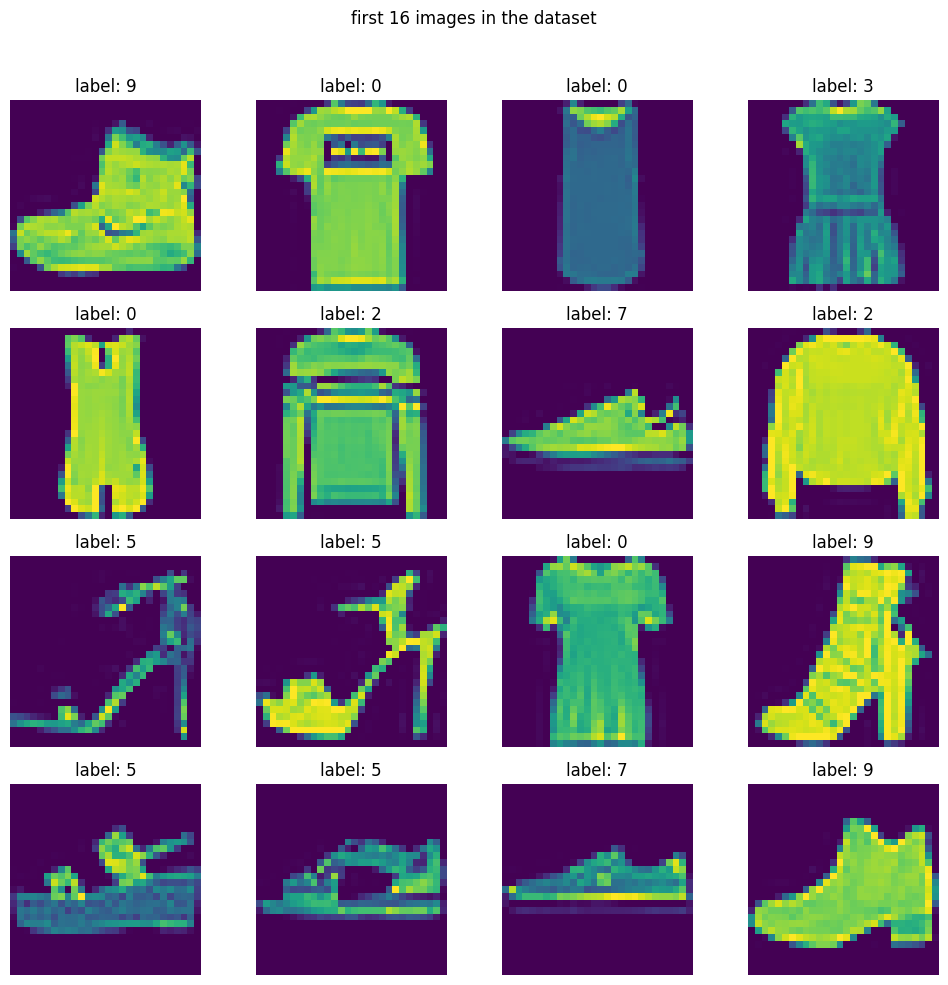

In [ ]:
#creating a 4x4 grid images
fig, axis = plt.subplots(4,4, figsize=(10,10))
fig.suptitle('first 16 images in the dataset')

# plot the first 16 images of the dataset

for i,ax in enumerate(axis.flat):
    img = df.iloc[i,1:].values.reshape(28,28) #reshape to 28x28
    ax.imshow(img) # image showing in grey
    ax.axis('off')
    ax.set_title(f'label: {df.iloc[i,0]}') # show lable

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [ ]:
# dividing data into train and test

X = df.iloc[:,1:].fillna(0).values # Fill NaN values with 0 before getting values
y = df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# scaling featurea -> bacially bringing features in between of 0 and 1

X_train =  X_train/255.0
X_test = X_test/255.0

### creating custom data set class

In [ ]:
class CustomDataset(Dataset):

  def __init__(self,features,lables):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.lables = torch.tensor(lables,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx],self.lables[idx]

In [ ]:
#creating train and test dataset objects

train_dataset = CustomDataset(X_train,y_train)
test_dataset = CustomDataset(X_test,y_test)

In [ ]:
len(train_dataset)

48000

In [ ]:
train_dataset[1]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0510, 0.4471, 0.4667, 0.3490, 0.3294, 0.1137, 0.0902,
         0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.4588, 0.2784, 0.2980, 0.2588, 0.1882, 0.1137, 0.0941,
         0.1529, 0.1020, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.2627, 0.6471, 0.3020, 0.2784, 0.1529, 0.1608, 0.2000,
         0.1098, 0.0118, 0.0549, 0.0314, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.5882, 0.6392, 0.4980, 0.3686, 0.0314, 0.1333,
         0.1725, 0.0627, 0.0000, 0.0510, 0.1216, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
#creating train and test loader
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True,pin_memory = True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False,pin_memory = True)

In [ ]:
#define nn module
class MyNn(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.BatchNorm1d(128), # batch_normalization optimization is used here
        nn.ReLU(),
        nn.Dropout(0.3), # dropouts optimization is used here
        nn.Linear(128,64),
        nn.BatchNorm1d(64), # batch_normalization optimization is used here
        nn.ReLU(),
        nn.Dropout(0.3), # dropouts optimization is used here
        nn.Linear(64,10)
    )

  def forward(self,x):
    return self.model(x)

In [ ]:
# seting learning rate and epochs
ecochs = 100
learning_rate = 0.01

In [ ]:
# instatiate the model
model = MyNn(X_train.shape[1])
model.to(device)

MyNn(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
#define loss and optimizer
criterian = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=learning_rate,weight_decay=1e-4)

In [ ]:
len(train_loader)

1500

In [ ]:
from torch.nn.modules import loss
# training loop

for epochs in range(ecochs):

  total_epoch_loss = 0.0

  for batch_features,batch_lables in train_loader:

    # moving data to GPU
    batch_features = batch_features.to(device)
    batch_lables = batch_lables.to(device)

    #forword pass
    outputs = model(batch_features)

    #calculate loss
    loss  = criterian(outputs,batch_lables)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #update grads
    optimizer.step()
    total_epoch_loss += loss.item()

  avg_epoch_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch [{epochs+1}/{ecochs}], Loss: {avg_epoch_loss:.4f}')

Epoch [1/100], Loss: 0.8152
Epoch [2/100], Loss: 0.5605
Epoch [3/100], Loss: 0.5082
Epoch [4/100], Loss: 0.4770
Epoch [5/100], Loss: 0.4570
Epoch [6/100], Loss: 0.4419
Epoch [7/100], Loss: 0.4276
Epoch [8/100], Loss: 0.4180
Epoch [9/100], Loss: 0.4062
Epoch [10/100], Loss: 0.3992
Epoch [11/100], Loss: 0.3888
Epoch [12/100], Loss: 0.3801
Epoch [13/100], Loss: 0.3718
Epoch [14/100], Loss: 0.3700
Epoch [15/100], Loss: 0.3635
Epoch [16/100], Loss: 0.3549
Epoch [17/100], Loss: 0.3559
Epoch [18/100], Loss: 0.3493
Epoch [19/100], Loss: 0.3490
Epoch [20/100], Loss: 0.3412
Epoch [21/100], Loss: 0.3373
Epoch [22/100], Loss: 0.3346
Epoch [23/100], Loss: 0.3337
Epoch [24/100], Loss: 0.3294
Epoch [25/100], Loss: 0.3258
Epoch [26/100], Loss: 0.3274
Epoch [27/100], Loss: 0.3177
Epoch [28/100], Loss: 0.3171
Epoch [29/100], Loss: 0.3138
Epoch [30/100], Loss: 0.3114
Epoch [31/100], Loss: 0.3056
Epoch [32/100], Loss: 0.3049
Epoch [33/100], Loss: 0.3023
Epoch [34/100], Loss: 0.3001
Epoch [35/100], Loss: 0

In [ ]:
#set model to eval mode
model.eval()

MyNn(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

evaluation on test data

In [ ]:
# evaluation code - no builtin functions

total = 0
correct = 0

with torch.no_grad():
  for batch_features,batch_lables in test_loader:
    #moving data to GPU
    batch_features = batch_features.to(device)
    batch_lables = batch_lables.to(device)

    output = model(batch_features)
    _,predicted = torch.max(output.data,1)
    total += batch_lables.shape[0]
    correct += (predicted == batch_lables).sum().item()

print(correct/total)

0.8984166666666666


Evaluation on training data

In [ ]:
total = 0
correc = 0

with torch.no_grad():
  for batch_features, batch_lables in train_loader:
    # move data to GPU
    batch_features, batch_lables = batch_features.to(device), batch_lables.to(device)
    output = model(batch_features)
    _, predicted = torch.max(output.data, 1)
    total += batch_lables.shape[0]
    correc = correc + (predicted == batch_lables).sum().item()

print(correc/total)

0.9596666666666667
